# SEDS-HW4
Homework #4 from SEDS


_note_ This is almost certainly going to be the most challenging homework so far.  It will build on everything you have learned from flow control, functions, lists, etc.  Although these instructions put the functions before the unit tests, you should follow the test driven development paradigm.

ALL CODE in `.py` files should be pep8 compliant.

### Assignment
1. Create a `.py` file called `knn.py` that contains your own implementation of a k-NN classifier.  _Hint_ You should have the following functions (at least): (2 pts)
 * A wrapping function that is the primary way of interacting with your code.  It takes as parameters, a training dataframe, a value of k and some input data to be classified. It returns the classification for the input data.
 * A function that returns the Euclidean distance between a row in the intput data to be classified.
 * A function that returns the list of sorted Euclidean distances between the input data and all rows in the dataframe. _Hint_ Append the distances associated with the rows to a list and use the `.sort()` method on your list.
 * A function that returns the class prediction based on the list of sorted Euclidean distances.
 * A wrapping function that helps the user decide on what `k` to use.  This function takes as parameters, a training dataframe, a testing dataframe and a list of values of `k` to try. It returns a dictionary with `k` as the keys and the training accuracy of the test set.  Accuracy is measured by percentage of classifications that were correct for that value of `k`.
2. Create a new Jupyter notebook called 'SEDS-HW4.ipynb' that documents how to use your k-NN functions in `knn.py` with an example.  Use the [`atomradii.csv`](https://uwdirect.github.io/SEDS_content/atomradii.csv) and [`testing.csv`](https://uwdirect.github.io/SEDS_content/testing.csv) that DSMCER used in for the inclass demo that relates atomic radii to atomic class.  Leverage Markdown for your demo. (1 pt)
3. Create unit tests and put them in `test_knn.py`.  There should be at least one unit test per function, though many more are appropriate for a real implementation.  Again, use the `atomradii` data for the unit tests. Paste the output of running nosetests below. (2 pts)

### Imports

In [64]:
import pandas as pd
import numpy as np
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt

import knn

### Setting up the training and testing datasets

In [65]:
# Setting up our training data and seperating based on the x,y coordinate and type
df_train = pd.read_csv('atomradii.csv')

X_train = df_train.iloc[:, :-2].values
y_train = df_train.iloc[:, 3].values


In [66]:
# Setting up our training data and seperating based on the x,y coordinate and type
df_test = pd.read_csv('testing.csv')

X_test = df_test.iloc[:, :-2].values
y_test = df_test.iloc[:, 3].values


### Euclidean distance calculator

In [67]:
# This function will simply return the euclidean distance between a row in the intput data to be classified.

def euclidean_distance(train_point, test_point):
    """This function calculates the euclidean distance between two points"""
    return np.sqrt(np.sum((train_point - test_point)**2))

In [68]:
euclidean_distance(np.array([1,2]), np.array([2,3])) # quick test

1.4142135623730951

### Sorted list of euclidean distances

In [69]:
def euclidean_list(X_train, y_train, test_point, k):
    """This function returns a sorted list of euclidean distances from a test point to all training points"""
    
    temp_list = [] # temporary list to store euclidean distances and other corresponding data
    
    for train_point in range(X_train.shape[0]): # calls on every training point for use in the euclidean_distance
        
        ED = euclidean_distance(X_train[train_point], test_point) #calculates euclidean distance
        temp_list.append([X_train[train_point], ED, y_train[train_point]]) # appends data to the temporary list
        
        EL = pd.DataFrame(temp_list, columns = ['training point', 'distance', 'class']) #converts temporary list to a dataframe
        sort_EL = EL.sort_values('distance')[:k] # sorts the dataframe based on k nearest neighbors
        
    return sort_EL

In [70]:
euclidean_list(X_train, y_train, X_test[1], 5) # quick test

,training point,distance,class
6,"[0.45, 0.68]",0.120416,TM
8,"[0.25, 0.87]",0.156205,Alk
5,"[0.32, 0.62]",0.158114,TM
7,"[0.14, 0.66]",0.254951,Alk
10,"[0.28, 1.01]",0.256320,Alk


###  KNN Function

In [71]:
def KNN(X_train, y_train, X_test, k):
    """This function returns the class prediction from the list of sorted Euclidean distances based on the KNN"""
    test_point_prediction = [] # empty list to append the predicted classifications
    
    for test_point in range(X_test.shape[0]): # calling on every test point for use in euclidean_list
        ED_list = euclidean_list(X_train, y_train, X_test[test_point], k)
        
        # this is the portion that actually chooses the class based on the greatest number of nearest neighbors
        test_point_label = stats.mode(ED_list['class'])[0]
        test_point_prediction.append([X_test[test_point], test_point_label]) 
        
        # Here, the test points and their corresponding predicted classifications are put into a data frame
        Classification = pd.DataFrame(test_point_prediction, columns = ['test point', 'classification'])
    
    return Classification 

In [72]:
KNN(X_train, y_train, X_test, 5)

,test point,classification
0,"[0.51, 1.12]",[Alk]
1,"[0.37, 0.77]",[Alk]
2,"[0.62, 0.35]",[PT]
3,"[0.62, 0.62]",[PT]
4,"[0.62, 0.93]",[Alk]


### Selecting a proper K value

#### Finding the accuracy

In [73]:
def accuracy(X_train, y_train, X_test, y_test, k):
    knn = KNN(X_train, y_train, X_test, k)
    acc = 100 * float((y_test == knn['classification']).sum()) / knn.shape[0]
    return acc

In [74]:
accuracy(X_train, y_train, X_test, y_test, 5)

60.0

In [75]:
# A wrapping function that helps the user decide on what k to use. This function takes as parameters, a training dataframe, a testing dataframe and a list of values of k to try. 
# It returns a dictionary with k as the keys and the training accuracy of the test set. 
# Accuracy is measured by percentage of classifications that were correct for that value of k.

def k_select(X_train, y_train, X_test, k_range):
    
    accuracy_list = []
    
    for k in k_range:
        accuracy_list.append(accuracy(X_train, y_train, X_test, y_test, k))
    
    k_plot = plt.plot(k_range, accuracy_list)
    plt.xlabel('k value')
    plt.ylabel('% accuracy')
    
    return k_plot

In [76]:
k_range = list(range(1,25))

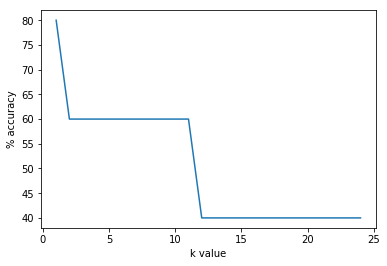

In [77]:

k_select(X_train, y_train, X_test, k_range)

# Unit tests

### Euclidean Distance Calculator

In [134]:
def test_euclidean_distance():
    """This is a test function for euclidean_distance """
    #The euclidean distance between the same point should be zero
    assert int(knn.euclidean_distance(np.array([1,1]), np.array([1,1]))) == 0, "Calculation incorrect"
               
    return 

In [135]:
test_euclidean_distance()

### Sorted List of euclidean distances

In [136]:
def test_euclidean_list():
    """This is a test function for euclidean_list """
    # Setting up our training data and seperating based on the x,y coordinate and type
    df_train = pd.read_csv('atomradii.csv')
    X_train = df_train.iloc[:, :-2].values
    y_train = df_train.iloc[:, 3].values
    
    # Setting up our training data and seperating based on the x,y coordinate and type
    df_test = pd.read_csv('testing.csv')
    X_test = df_test.iloc[:, :-2].values
    y_test = df_test.iloc[:, 3].values
    
    test_point = np.array([1,1])
    k = 5
    
    temp_list = [] # temporary list to store euclidean distances and other corresponding data
    
    for train_point in range(X_train.shape[0]): # calls on every training point for use in the euclidean_distance
        
        ED = knn.euclidean_distance(X_train[train_point], test_point) #calculates euclidean distance
        temp_list.append([X_train[train_point], ED, y_train[train_point]]) # appends data to the temporary list
        
        EL = pd.DataFrame(temp_list, columns = ['training point', 'distance', 'class']) #converts temporary list to a dataframe
        sort_EL = EL.sort_values('distance')[:k] # sorts the dataframe based on k nearest neighbors
        
        #Asserting that there should be no null values in dataframe if sorted correctly
        assert sort_EL.isnull().values.any() == False,  "null (NaN) values are present, not sorting correctly"
        
    return 

    
 

In [137]:
test_euclidean_list()

### KNN Function

In [144]:
def test_KNN():
    """This is a test function for KNN """
    # Setting up our training data and seperating based on the x,y coordinate and type
    df_train = pd.read_csv('atomradii.csv')
    X_train = df_train.iloc[:, :-2].values
    y_train = df_train.iloc[:, 3].values
    
    # Setting up our training data and seperating based on the x,y coordinate and type
    df_test = pd.read_csv('testing.csv')
    X_test = df_test.iloc[:, :-2].values
    y_test = df_test.iloc[:, 3].values
    
    test_point = np.array([1,1])
    k = 5
    
    test_point_prediction = [] # empty list to append the predicted classifications
    
    for test_point in range(X_test.shape[0]): # calling on every test point for use in euclidean_list
        ED_list = knn.euclidean_list(X_train, y_train, X_test[test_point], k)
        
        # this is the portion that actually chooses the class based on the greatest number of nearest neighbors
        test_point_label = stats.mode(ED_list['class'])[0]
        test_point_prediction.append([X_test[test_point], test_point_label]) 
        
        # Here, the test points and their corresponding predicted classifications are put into a data frame
        Classification = pd.DataFrame(test_point_prediction, columns = ['test point', 'classification'])
        
        #Asserting that there should be no null values in dataframe if classified correctly
        assert Classification.isnull().values.any() == False,  "null (NaN) values are present, not classifying correctly"
        
    return
    

In [145]:
test_KNN()

### Accuracy


In [140]:
def test_accuracy():
    """This is a test function for accuracy """
    # Setting up our training data and seperating based on the x,y coordinate and type
    df_train = pd.read_csv('atomradii.csv')
    X_train = df_train.iloc[:, :-2].values
    y_train = df_train.iloc[:, 3].values
    
    # Setting up our training data and seperating based on the x,y coordinate and type
    df_test = pd.read_csv('testing.csv')
    X_test = df_test.iloc[:, :-2].values
    y_test = df_test.iloc[:, 3].values
    
    test_point = np.array([1,1])
    k = 5
    
    neighbor = knn.KNN(X_train, y_train, X_test, k)
    acc = 100 * float((y_test == neighbor['classification']).sum()) / neighbor.shape[0]
    
    assert isinstance(acc, float), "returned accuracy is not a float value" 
    
    return 
    
    

In [141]:
test_accuracy()

### K selector


In [142]:
def test_k_select():
    """This is a test function for k_select """
     # Setting up our training data and seperating based on the x,y coordinate and type
    df_train = pd.read_csv('atomradii.csv')
    X_train = df_train.iloc[:, :-2].values
    y_train = df_train.iloc[:, 3].values
    
    # Setting up our training data and seperating based on the x,y coordinate and type
    df_test = pd.read_csv('testing.csv')
    X_test = df_test.iloc[:, :-2].values
    y_test = df_test.iloc[:, 3].values
    
    test_point = np.array([1,1])
    k_range = list(range(1,25))
    
    accuracy_list = []
    
    for k in k_range:
        accuracy_list.append(knn.accuracy(X_train, y_train, X_test, y_test, k))
        
    # Asserting that the returned list is not empty   
    assert len(accuracy_list) >0, "List is empty"
    
    
    return 

In [143]:
test_k_select()